In [20]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
names =[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
    'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'
]

In [21]:
dataset_url='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
df=pd.read_csv(dataset_url, header=None, delim_whitespace=True, names=names,na_values='?')
df.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [22]:
df.shape

(506, 14)

In [23]:
print("num samples=",df.shape[0],", num attributes=",df.shape[1])

num samples= 506 , num attributes= 14


In [24]:
y=np.array(df['PRICE'])
mean=np.mean(y)
mean=round(mean,2)
count=0
for i in y:
    if i>40:
        count+=1
percent=(count/len(y))*100
percent=round(percent,1)
print("The mean house price is ",mean," thousands of dollars. Only ",
     percent, "percent are above $40k")

The mean house price is  22.53  thousands of dollars. Only  6.1 percent are above $40k


In [25]:
x=np.array(df['RM'])

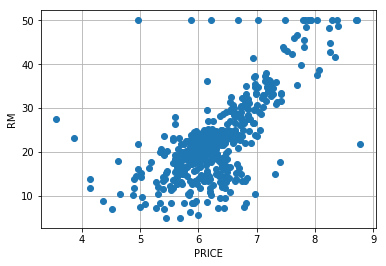

In [26]:
plt.plot(x,y,'o')
plt.xlabel('PRICE')
plt.ylabel('RM')
plt.grid(True)

In [27]:
def fit_linear(x, y):
    xm = np.mean(x)
    ym = np.mean(y)
    syy = np.mean((y-ym)**2)
    syx = np.mean((y-ym)*(x-xm))
    sxx = np.mean((x-xm)**2)
    beta1 = syx/sxx
    beta0 = ym - beta1*xm
    
    yhat=beta0+beta1*x
    rss = np.mean((y-yhat)**2)
    tss = syy
    rsq = 1 - rss/tss
    
    return beta0,beta1,rsq

In [28]:
beta0,beta1,rsq=fit_linear(x,y)
print("beta0=",beta0,", beta1=",beta1,", rsq=",rsq)

beta0= -34.67062077643857 , beta1= 9.10210898118031 , rsq= 0.4835254559913341


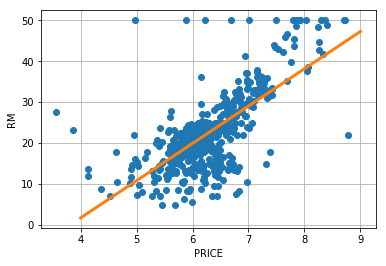

In [30]:
xplt = np.array([4,9])          
yplt = beta1*xplt + beta0

plt.plot(x,y,'o')                    # Plot the data points
plt.plot(xplt,yplt,'-',linewidth=3)  # Plot the regression line
plt.xlabel('PRICE')
plt.ylabel('RM')
plt.grid(True)

In [31]:
for i in range(0, len(names)-1):
    beta0, beta1, rsq = fit_linear(df[names[i]], y)
    print(names[i],"\t %.3f" % rsq)

CRIM 	 0.151
ZN 	 0.130
INDUS 	 0.234
CHAS 	 0.031
NOX 	 0.183
RM 	 0.484
AGE 	 0.142
DIS 	 0.062
RAD 	 0.146
TAX 	 0.220
PTRATIO 	 0.258
B 	 0.111
LSTAT 	 0.544
